In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [23]:
# Download the Bitcoin data
btc_data = yf.download('BTC-USD', start='2022-01-01', end='2024-01-01')  # Use a smaller date range to reduce resource usage

# Ensure data has daily frequency
btc_data.index = pd.to_datetime(btc_data.index)
btc_data = btc_data.asfreq('D')  # Daily frequency

[*********************100%***********************]  1 of 1 completed


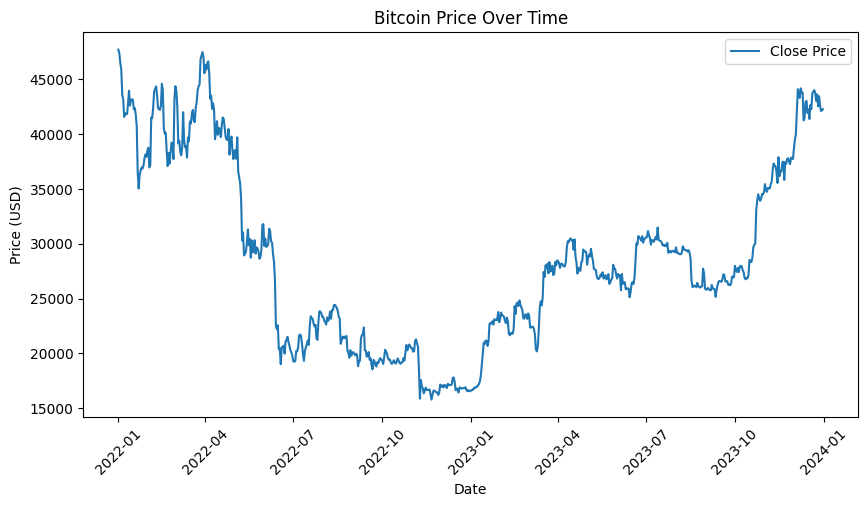

In [24]:
# Step 2: Visualize the closing price of Bitcoin
plt.figure(figsize=(10, 5))
plt.plot(btc_data.index, btc_data['Close'], label='Close Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

ADF Statistic: -1.508605780261823
p-value: 0.5292499682205458
The data is non-stationary. Differencing is required.
RMSE: 6252.525063579573


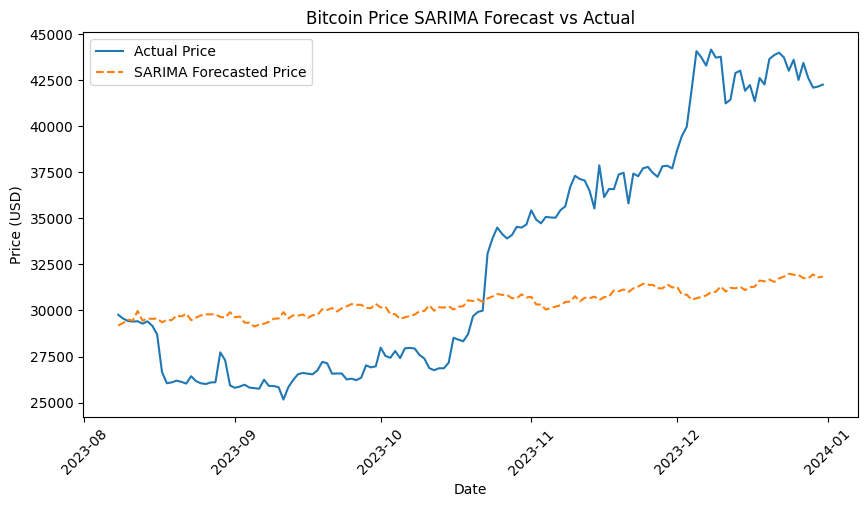

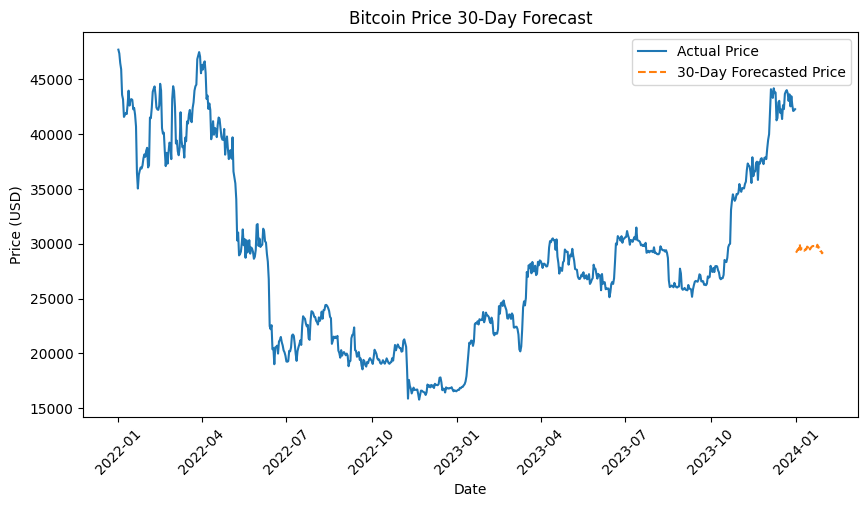

In [31]:
def adf_test(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("The data is non-stationary. Differencing is required.")
    else:
        print("The data is stationary.")

# Apply ADF test to Bitcoin data
adf_test(btc_data['Close'])

# Step 4: Differencing to make data stationary (if necessary)
btc_data['Close_diff'] = btc_data['Close'].diff().dropna()

# Step 5: Split data into training and testing sets (80% training, 20% testing)
train_size = int(len(btc_data) * 0.8)
train, test = btc_data['Close'][:train_size], btc_data['Close'][train_size:]

# Step 6: Fit a SARIMA model (Seasonal ARIMA)
# Assuming monthly seasonality (24 for daily data, you can change this)
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
model_sarima_fit = model_sarima.fit(disp=False)

# Step 7: Forecast the next 30 days
forecast = model_sarima_fit.forecast(steps=30)

# Step 8: Evaluate model performance using RMSE
rmse = np.sqrt(mean_squared_error(test, model_sarima_fit.forecast(steps=len(test))))
print(f"RMSE: {rmse}")

# Step 9: Plot actual vs forecasted prices
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual Price')
plt.plot(test.index, model_sarima_fit.forecast(steps=len(test)), label='SARIMA Forecasted Price', linestyle='--')
plt.title('Bitcoin Price SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Step 10: Plot the 30-day forecast for future dates
forecast_dates = pd.date_range(start=btc_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.figure(figsize=(10, 5))
plt.plot(btc_data.index, btc_data['Close'], label='Actual Price')
plt.plot(forecast_dates, forecast, label='30-Day Forecasted Price', linestyle='--')
plt.title('Bitcoin Price 30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.show()